In [1]:
import nltk, re
import numpy as np
import pandas as pd
import sklearn
from nltk.tokenize import word_tokenize
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pprint, time
import pickle

In [18]:
with open('tagged_lines_df.pkl', 'rb') as f:
    poem_df = pickle.load(f)

In [19]:
poem_df = poem_df.drop(['author','title'], axis=1)

In [20]:
poem_df.head()

,line,line_no,words,length_in_words,lexical_diversity,word_lengths,max_word_length,pos_tags
1,in its complex ovoid emptiness,2,"[in, its, complex, ovoid, emptiness]",5,1.000,"[2, 3, 7, 5, 9]",9,"[IN, PRP$, JJ, JJ, NN]"
2,a skillful pundit coined it as a sort,3,"[a, skillful, pundit, coined, it, as, a, sort]",8,0.875,"[1, 8, 6, 6, 2, 2, 1, 4]",8,"[DT, JJ, NN, VBD, PRP, IN, DT, NN]"
3,of stopgap doorstop for those,4,"[of, stopgap, doorstop, for, those]",5,1.000,"[2, 7, 8, 3, 5]",8,"[IN, NN, VBP, IN, DT]"
4,quaint equations,5,"[quaint, equations]",2,1.000,"[6, 9]",9,"[NN, NNS]"
5,romans never,6,"[romans, never]",2,1.000,"[6, 5]",6,"[NNS, RB]"


In [5]:
def clean_tags(tags):
    return [tag for tag in tags if tag.isalpha()]

poem_df['pos_tags'] = poem_df.pos_tags.map(clean_tags)

In [6]:
from sklearn.model_selection import train_test_split
poem_train, poem_test = train_test_split(poem_df, test_size=0.05, random_state=13)
print("Length of Training Set: ", len(poem_train))
print("Length of Test Set: ", len(poem_test))
print("-" * 120)
print("Training Data Overview:\n")
print(poem_train.head())

Length of Training Set:  390963
Length of Test Set:  20577
------------------------------------------------------------------------------------------------------------------------
Training Data Overview:

                                                     line  line_no  \
37559            humble dove that coos when it is morning       37   
351579                                     baked in a pie        4   
373814   somewhere you are lying in a white bed the clock        7   
240065                                   soft now squeeze       26   
261607  cupid piercing the heart through suddenly and ...       16   

                                                    words  length_in_words  \
37559   [humble, dove, that, coos, when, it, is, morning]                8   
351579                                [baked, in, a, pie]                4   
373814  [somewhere, you, are, lying, in, a, white, bed...               10   
240065                               [soft, now, squeeze]     

In [7]:
# train_tokens, train_tags = sum(poem_train.words.to_list(), []), sum(poem_train.pos_tags.to_list(),[])
# test_tokens, test_tags = sum(poem_test.words.to_list(), []), sum(poem_test.pos_tags.to_list(),[])

In [8]:
train_tokens, train_tags = poem_train.words.explode().to_list(), poem_train.pos_tags.explode().to_list()
test_tokens, test_tags = poem_test.words.explode().to_list(), poem_test.pos_tags.explode().to_list()

In [9]:
# test = [['these','are','hats'], ['these','are','not','hats']]
# print(test)
# print(flatten(test))
# print(pd.Series(train_tokens).map(len).describe())
print(train_tags[0:5])

['JJ', 'VBD', 'DT', 'NNS', 'WRB']


In [10]:
train_vocab = set(tuple([token for token in train_tokens if (len(token) > 1 or token in ['a','i','u','x'])]))
train_tag_tups = tuple([''.join(str(item)) for item in train_tags])
train_tagset = set(train_tag_tups)

In [11]:
print(len(train_tagset))
print(len(train_vocab))

40
81189


In [12]:
token_freq = nltk.FreqDist(train_tokens)

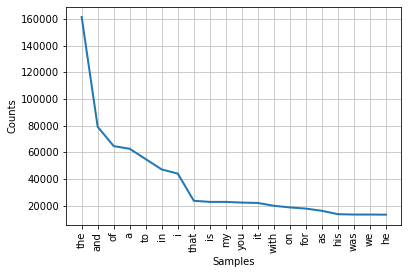

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
token_freq.plot(20, cumulative=False)

In [14]:
pos_freq = nltk.FreqDist(train_tags)

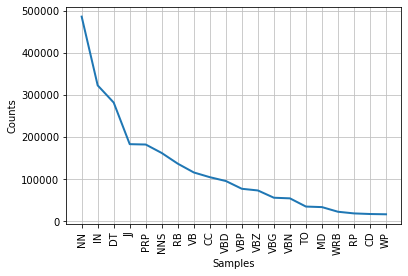

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
pos_freq.plot(20, cumulative=False)

In [16]:
print(f"Size --------------- \nVocabulary: {len(train_vocab)} \nTagset: {len(train_tagset)}")
print("\nAvailable Tags ----- \n")
print(train_tagset)

Size --------------- 
Vocabulary: 81189 
Tagset: 40

Available Tags ----- 

{'VBD', 'RB', 'VBP', 'MD', 'VB', 'ADD', 'DT', 'RBR', 'NNS', 'FW', 'TO', 'AFX', 'JJS', 'UH', 'WDT', 'CC', 'NFP', 'JJR', 'CD', 'WP', 'VBN', 'RBS', 'XX', 'WRB', 'PRP', 'LS', 'VBZ', 'HYPH', 'IN', 'NNP', 'EX', 'RP', 'JJ', 'nan', 'NN', 'POS', 'SYM', 'NNPS', 'PDT', 'VBG'}


In [17]:
# P(w/t)
len_pos_tags = 
len_vocab = 

word_given_tag = np.zeros((len(train_tagset), len(train_vocab)))

SyntaxError: invalid syntax (<ipython-input-17-10347a195c78>, line 2)

In [ ]:
# emission probability
